<a href="https://colab.research.google.com/github/ibsatportfolio/email-spam-and-not-spam/blob/main/Email_Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📧Email Spam and Not Spam Classifier**
### Problem Defination
Spam email is unsolicited and unwanted junk email sent out in bulk to an indiscriminate recipient list. Typically, spam is sent for commercial purposes. It can be sent in massive volume by botnets, networks of infected computers. So create a classifier that identify the spam and not spam emails.

### Dataset
Use the Email Spam Dataset from kaggle which contain 10000 rows and 4 columns.
https://www.kaggle.com/datasets/nitishabharathi/email-spam-dataset?select=enronSpamSubset.csv


## **1. Import dependencies(Preparing tools)**
Import pandas, Matplotlib and NumPy for data analysis and manipulation.

In [ ]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plots to appear in the notebook
%matplotlib inline
import pickle

# To extract the features in text data
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Import Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Import Model evaluators
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve

## **2. Load the data**

In [ ]:
data = pd.read_csv('email_spam-not_spam.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,Body,Label
0,2469,2469,Subject: stock promo mover : cwtd\n * * * urge...,1
1,5063,5063,Subject: are you listed in major search engine...,1
2,12564,12564,"Subject: important information thu , 30 jun 20...",1
3,2796,2796,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,1468,1468,"Subject: "" bidstogo "" is places to go , things...",1


In [ ]:
# rows and columns
data.shape

(10000, 4)

### **3. Data Exploration (exploratory data analysis or EDA)**
To find out more about the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    10000 non-null  int64 
 1   Unnamed: 0.1  10000 non-null  int64 
 2   Body          10000 non-null  object
 3   Label         10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [ ]:
# To check the null or NaN values in data
data.isna().sum()

Unnamed: 0      0
Unnamed: 0.1    0
Body            0
Label           0
dtype: int64

In [ ]:
data.describe()

,Unnamed: 0,Unnamed: 0.1,Label
count,10000.000000,10000.000000,10000.000000
mean,17041.404600,17041.404600,0.500000
std,9735.989695,9735.989695,0.500025
min,8.000000,8.000000,0.000000
25%,8562.000000,8562.000000,0.000000
50%,17159.000000,17159.000000,0.500000
75%,25509.250000,25509.250000,1.000000
max,33698.000000,33698.000000,1.000000


In [ ]:
# To check the columns
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Body', 'Label'], dtype='object')

In [ ]:
# To drop the first two columns as the information in these columns is not useful
data.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'], inplace = True)

In [ ]:
data.head(10)

,Body,Label
0,Subject: stock promo mover : cwtd\n * * * urge...,1
1,Subject: are you listed in major search engine...,1
2,"Subject: important information thu , 30 jun 20...",1
3,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,"Subject: "" bidstogo "" is places to go , things...",1
5,Subject: dont pay more than $ 100 for ur softw...,1
6,Subject: paliourg\n micros 0 ft for pennies\n ...,1
7,"Subject: all graphics software available , che...",1
8,"Subject: the man of stteel\n hello , welcome t...",1
9,"Subject: adjourn pasteup\n paliourg ,\n lookin...",1


In [ ]:
data.tail(5)

,Body,Label
9995,"Subject: monday 22 nd oct\n louise ,\n do you ...",0
9996,Subject: missing bloomberg deals\n stephanie -...,0
9997,Subject: eops salary survey questionnaire\n we...,0
9998,"Subject: q 3 comparison\n hi louise ,\n i have...",0
9999,Subject: confidential folder to safely pass in...,0


In [ ]:
# To check and drop the duplicate values(rows) in the data
data.drop_duplicates(inplace = True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
# To find out how many of each class there in label column
data["Label"].value_counts(normalize = True)

0    0.50862
1    0.49138
Name: Label, dtype: float64

From this it is concluded that this data has balanced labels so it is a balanced data.

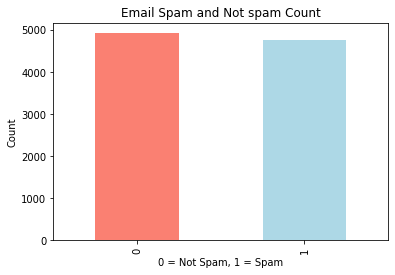

In [ ]:
# Plot the value counts of Label column with a bar graph
data.Label.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

# Add some attributes to it
plt.title("Email Spam and Not spam Count")
plt.xlabel("0 = Not Spam, 1 = Spam")
plt.ylabel("Count");

In [ ]:
# To check the datatypes of columns
data.dtypes

Body     object
Label     int64
dtype: object

## **4. Modeling**
To do this, split the target variable(Label) from the rest(Body).

In [ ]:
# Input or independent variable
X = data['Body']

# Target or dependent variable
Y = data['Label']

In [ ]:
X.head()

0    Subject: stock promo mover : cwtd\n * * * urge...
1    Subject: are you listed in major search engine...
2    Subject: important information thu , 30 jun 20...
3    Subject: = ? utf - 8 ? q ? bask your life with...
4    Subject: " bidstogo " is places to go , things...
Name: Body, dtype: object

In [ ]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

In [ ]:
# Labels
Y

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Label, Length: 9687, dtype: int64

## Training and test split
To split data into a training and test set, Use Scikit-Learn's train_test_split() and feed it independent and dependent variables (X & Y).  Split the data into 70% training & 30% testing.

In [ ]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train(70%) & test set(30%)
X_train, X_test, y_train, y_test = train_test_split(X, # independent variable
                                                    Y, # dependent variable
                                                    test_size = 0.3) # percentage of data to use for test set

In [ ]:
X_train.head(), X_train.shape

(4865    Subject: fly macromedia . xp pro ( sp 2 ) , ad...
 2299    Subject: look at this ! via @ gra , le ^ vitra...
 1779    Subject: [ ilug ] from the desk of : george os...
 7496    Subject: assume enw is doing for you what you ...
 7290    Subject: re : new color printer\n sorry ,\n do...
 Name: Body, dtype: object, (6780,))

In [ ]:
y_train, len(y_train)

(4865    1
 2299    1
 1779    1
 7496    0
 7290    0
        ..
 5979    0
 5431    0
 5631    0
 869     1
 7530    0
 Name: Label, Length: 6780, dtype: int64, 6780)

So 6780 samples are used to train on. Now let's look at test data.

In [ ]:
X_test.head(), X_test.shape

(8974    Subject: re : chapter\n dear vince ,\n that ' ...
 8329    Subject: 98 - 6892 overflow\n can you please e...
 1718    Subject: unique idea : $ 50 no wager requireme...
 4662    Subject: my portfolio\n hi\n my name is ernie ...
 39      Subject: you need only 15 minutes to prepare f...
 Name: Body, dtype: object, (2907,))

In [ ]:
y_test, len(y_test)

(8974    0
 8329    0
 1718    1
 4662    1
 39      1
        ..
 9900    0
 5909    0
 9242    0
 9946    0
 1488    1
 Name: Label, Length: 2907, dtype: int64, 2907)

## Feature Extraction (Text data)
To improve the accuracy of learning algorithm and shorten the time.

In [ ]:
# Download the stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Create a function to preprocess the text data
def preprocess_text(Body):

  # 1. Remove punctuation
  not_punc = [char for char in Body if char not in string.punctuation]
  not_punc = ''.join(not_punc)

  # 2. Remove the stopkeywords
  clean_words = [word for word in not_punc.split() if word.lower() not in stopwords.words('english')]

  # 3. Return a list of clean text(Label) words
  return clean_words

In [ ]:
# To show the list of tokens(Tokenization)
data['Body'].head().apply(preprocess_text)

0    [Subject, stock, promo, mover, cwtd, urgent, i...
1    [Subject, listed, major, search, engines, subm...
2    [Subject, important, information, thu, 30, jun...
3    [Subject, utf, 8, q, bask, life, utf, 8, q, in...
4    [Subject, bidstogo, places, go, things, hello,...
Name: Body, dtype: object

In [ ]:
# Now to convert the collection of text to a matrix of token counts
# Call the preprocess_text function
feature_extraction = CountVectorizer(analyzer= preprocess_text)

# Separately fit the CountVectorizer to X_train and X_test data
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [ ]:
print(X_train, X_train.shape)

4865    Subject: fly macromedia . xp pro ( sp 2 ) , ad...
2299    Subject: look at this ! via @ gra , le ^ vitra...
1779    Subject: [ ilug ] from the desk of : george os...
7496    Subject: assume enw is doing for you what you ...
7290    Subject: re : new color printer\n sorry ,\n do...
                              ...                        
5979    Subject: 2000 chairman ' s award\n everyday he...
5431    Subject: thank you for the memories\n dear all...
5631    Subject: ces - duke en field services\n the pu...
869     Subject: have you ever seen pretty sexy skirwh...
7530    Subject: hea 34 th annual sports tournament re...
Name: Body, Length: 6780, dtype: object (6780,)


In [ ]:
print(X_train_features, X_train_features.shape)

  (0, 5583)	1
  (0, 28504)	1
  (0, 41495)	2
  (0, 70717)	2
  (0, 52040)	3
  (0, 60524)	2
  (0, 1331)	3
  (0, 6449)	4
  (0, 50156)	2
  (0, 44642)	1
  (0, 47162)	3
  (0, 47590)	1
  (0, 2102)	1
  (0, 6143)	2
  (0, 46380)	3
  (0, 53680)	2
  (0, 28041)	2
  (0, 17465)	1
  (0, 52172)	1
  (0, 48886)	1
  (0, 23410)	1
  (0, 51084)	1
  (0, 60201)	1
  (0, 61277)	1
  (0, 1332)	1
  :	:
  (6779, 54954)	1
  (6779, 2353)	2
  (6779, 58093)	1
  (6779, 18975)	1
  (6779, 43337)	1
  (6779, 54667)	1
  (6779, 54998)	1
  (6779, 40793)	1
  (6779, 43635)	1
  (6779, 41638)	1
  (6779, 3972)	1
  (6779, 9440)	1
  (6779, 16765)	1
  (6779, 9954)	1
  (6779, 60882)	2
  (6779, 65048)	2
  (6779, 63761)	1
  (6779, 32480)	3
  (6779, 18814)	1
  (6779, 38611)	1
  (6779, 64670)	1
  (6779, 33776)	2
  (6779, 299)	1
  (6779, 3936)	1
  (6779, 33777)	1 (6780, 71845)


In [ ]:
print(X_test_features, X_test_features.shape)

  (0, 175)	1
  (0, 380)	1
  (0, 1139)	1
  (0, 1334)	2
  (0, 2026)	1
  (0, 2069)	1
  (0, 2102)	1
  (0, 2156)	1
  (0, 3211)	1
  (0, 3498)	1
  (0, 5583)	1
  (0, 7503)	1
  (0, 9160)	1
  (0, 9806)	1
  (0, 11569)	2
  (0, 15057)	2
  (0, 15504)	2
  (0, 15539)	5
  (0, 15683)	1
  (0, 16030)	6
  (0, 17353)	1
  (0, 18136)	1
  (0, 18765)	1
  (0, 20273)	1
  (0, 20389)	1
  :	:
  (2906, 34382)	1
  (2906, 40648)	1
  (2906, 41700)	1
  (2906, 44393)	1
  (2906, 44437)	1
  (2906, 46500)	1
  (2906, 50157)	1
  (2906, 50673)	1
  (2906, 51508)	1
  (2906, 52091)	1
  (2906, 53858)	1
  (2906, 57316)	1
  (2906, 58042)	1
  (2906, 59541)	1
  (2906, 61104)	1
  (2906, 61283)	1
  (2906, 63980)	1
  (2906, 66995)	1
  (2906, 67148)	1
  (2906, 67171)	1
  (2906, 68323)	1
  (2906, 70470)	2
  (2906, 70517)	1
  (2906, 70686)	2
  (2906, 71073)	1 (2907, 71845)


## Training of Models
Now Data is ready to train on the training set of data. Four machine learning models (in Scikit-Learn library) used:
1. Multinomial Naive Bayes
2. Logistic Regression
3. Random Forest Classifier
4. Support Vector Classifier.


In [ ]:
# Put the models in a dictionary
models = {"Multinomial Naive Bayes": MultinomialNB(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest Classifier": RandomForestClassifier(),
          "Support Vector Classifier" : SVC(kernel='sigmoid', gamma=1.0)}

# Create a function to fit and score(accuracy) models
def fit_and_score(models, X_train_features, X_test_features, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train_features : training data
    X_test_features : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """ # Docstring of fit_and_score function

    # Random seed for reproducible results
    np.random.seed(42)

    # Make a list to keep model scores(accuracy)
    model_scores = {}
    model_pred = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train_features, y_train)

        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test_features, y_test)
        # To predict the lebals on testing data
        model_pred[name] = model.predict(X_test_features)
    return model_scores

## **5. Evaluation**

In [ ]:
# To show the results(accuracy) of all three models
model_scores= fit_and_score(models=models,
                             X_train_features=X_train_features,
                             X_test_features=X_test_features,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Multinomial Naive Bayes': 0.9810801513587891,
 'Logistic Regression': 0.978672170622635,
 'Random Forest Classifier': 0.9766081871345029,
 'Support Vector Classifier': 0.6965944272445821}

## Model Comparison
As I've saved the models scores to a dictionary, then I can plot them by first converting them to a DataFrame.

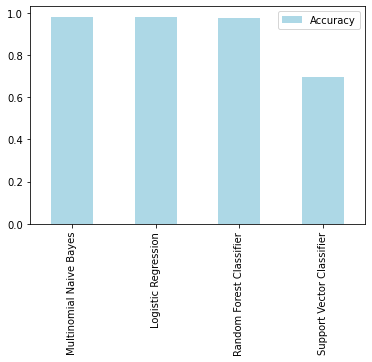

In [ ]:
# Plot the bar graph to visualize the models score comparison
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar(color = 'lightblue');

So we can see that Multinomial Naive Bayes performs best with the accuracy of 0.98

### **6. Hyperparameter tuning**

## Tuning models with RandomizedSearchCV
There's a number of different hyperparameters we can tune for:
*   Multinomial Naive Bayes
*   Logistic Regression
*   Random Forest Classifier


Try different combination of hyperparameters to improve score(accuracy).



In [ ]:
# Different Multinomial Naive Bayes hperparameters
mul_nb_grid = {"alpha": np.arange(0.1, 2, 0.1)}

# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rfc_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Pass the different hyperparameters from mul_nb as well as set n_iter = 50. This means, RandomizedSearchCV will try 20 different combinations of hyperparameters from mul_nb and save the best ones.

In [ ]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for Multinomial Naive Bayes
rsc_mul_nb = RandomizedSearchCV(MultinomialNB(),
                                param_distributions=mul_nb_grid,
                                cv=5,
                                n_iter=100,)

# Fit random hyperparameter search model
rsc_mul_nb.fit(X_train_features, y_train);

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 19 is smaller than n_iter=100. Running 19 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
# Save the model to save time
pickle.dump(rsc_mul_nb, open('model1.pkl', 'wb'))

In [ ]:
# Load the model
pickled_model1 = pickle.load(open('model1.pkl', 'rb'))

In [ ]:
pickled_model1

RandomizedSearchCV(cv=5, estimator=MultinomialNB(), n_iter=100,
                   param_distributions={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9])})

In [ ]:
# To show the best parameters
pickled_model1.best_params_

{'alpha': 0.6}

In [ ]:
pickled_model1.score(X_test_features, y_test)

0.9814241486068112

Pass the different hyperparameters from log_reg_grid as well as set n_iter = 20. This means, RandomizedSearchCV will try 20 different combinations of hyperparameters from log_reg_grid and save the best ones.

In [ ]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train_features, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
# Save the model to save time
pickle.dump(rs_log_reg, open('model2.pkl', 'wb'))

In [ ]:
# Load the model
pickled_model2 = pickle.load(open('model2.pkl', 'rb'))

In [ ]:
pickled_model2

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
# To show the best parameters
pickled_model2.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [ ]:
pickled_model2.score(X_test_features, y_test)

0.9797041623667011

Now after tuning of *LogisticRegression* using RandomizedSearchCV, do the same for RandomForestClassifier.

In [ ]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rfc_grid,
                           cv=5,
                           n_iter=10,
                           verbose=True)

# Fit random hyperparameter search model
rs_rfc.fit(X_train_features, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
# Save the model to save time
pickle.dump(rs_rfc, open('model3.pkl', 'wb'))

In [ ]:
# Load the model
pickled_model3 = pickle.load(open('model3.pkl', 'rb'))

In [ ]:
# Find the best parameters
pickled_model3.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': None}

In [ ]:
# Evaluate the randomized search random forest model
pickled_model3.score(X_test_features, y_test)

0.9631922944616443

### **7. Evaluating a classification model, beyond accuracy**
*  ROC curve and AUC score
*  Confusion matrix
*  Classification report
*  Precision
*  Recall
*  F1-score

### Tuned Multinomial Naive Bayes

In [ ]:
# Make preidctions on test data
y_preds = pickled_model1.predict(X_test_features)

In [ ]:
y_preds

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
y_test

8974    0
8329    0
1718    1
4662    1
39      1
       ..
9900    0
5909    0
9242    0
9946    0
1488    1
Name: Label, Length: 2907, dtype: int64

### 1. ROC Curve and AUC Scores

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


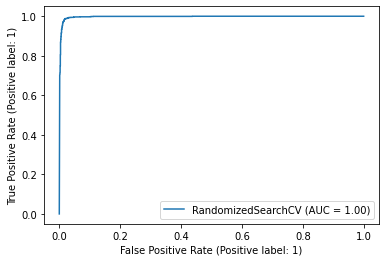

In [ ]:
# Plot ROC curve and calculate AUC metric on Multinomial Naive Bayes classifier
plot_roc_curve(pickled_model1, X_test_features, y_test);

As our model gets the perfect AUC score of 1.0.

### Confusion matrix

In [ ]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[1451   23]
 [  31 1402]]


To make it more visual lets create a function that uses seaborn's heatmap()

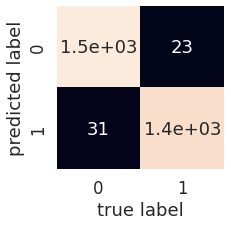

In [ ]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")

plot_conf_mat(y_test, y_preds)

### Classification report
A classification report that give us information of the precision and recall of the model for each class.

In [ ]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1474
           1       0.98      0.98      0.98      1433

    accuracy                           0.98      2907
   macro avg       0.98      0.98      0.98      2907
weighted avg       0.98      0.98      0.98      2907



### **Building a Predictive System**

In [ ]:
input_mail = ["Subject: all graphics software available , cheap oem versions . good morning , we we offer latest. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = pickled_model1.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Not Spam,')

else:
  print('Spam')

[1]
Not Spam,
